### SIZE DEPENDENCE OF HYDROGEN IN α-IRON

In [2]:
import pyiron
import numpy as np
import matplotlib.pylab as plt

In [3]:
potential = 'FeH-NNIP'

In [4]:
pr = pyiron.Project('size')

In [5]:
job = pr.create.job.Lammps('bulk', delete_existing_job=True)
bulk = pr.create.structure.bulk('Fe', cubic=True)
job.structure = bulk
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)
bulk = job.get_structure(-1)
bulk.get_cell()

The job bulk was saved and received the ID: 10608


Cell([[2.8299282001208694, 1.7328312560474265e-16, 1.7328312560474265e-16], [0.0, 2.8299282001208694, 1.7328312560474263e-16], [0.0, 0.0, 2.8299282001208694]])

In [6]:
# 16 atoms
job = pr.create.job.Lammps('sc_16', delete_existing_job=True)
sc_16 = bulk.repeat([2,2,2])

cell = sc_16.get_cell()
H = pr.create.structure.atoms(['H'], [(2.83/2, 2.83, 2.83/4*6-2.83/4)], cell=cell)
sc_16 += H

job.structure = sc_16
job.potential = potential
job.calc_minimize()
job.run(delete_existing_job=True)


The job sc_16 was saved and received the ID: 10609


In [7]:
# 54
job = pr.create.job.Lammps('sc_54', delete_existing_job=True)
sc_54 = bulk.repeat([3,3,3])

cell = sc_54.get_cell()
H = pr.create.structure.atoms(['H'], [(2.83/2, 2.83, 2.83/4*6-2.83/4)], cell=cell)
sc_54 += H

job.structure = sc_54
job.potential = potential
job.calc_minimize()
job.run(delete_existing_job=True)

The job sc_54 was saved and received the ID: 10610


In [8]:
# 128
job = pr.create.job.Lammps('sc_128', delete_existing_job=True)
sc_128 = bulk.repeat([4,4,4])

cell = sc_128.get_cell()
H = pr.create.structure.atoms(['H'], [(2.83/2, 2.83, 2.83/4*6-2.83/4)], cell=cell)
sc_128 += H

job.structure = sc_128
job.potential = potential
job.calc_minimize()
job.run(delete_existing_job=True)

The job sc_128 was saved and received the ID: 10611


In [9]:
job = job.load('sc_16')
p = job.output.pressures[0] - job.output.pressures[-1]
p_main = np.diagonal(p)
P1 = p_main.mean()
P1
E1 = job.output.energy_tot[0] - job.output.energy_tot[-1]

In [10]:
job = job.load('sc_54')
p = job.output.pressures[0] - job.output.pressures[-1]
p_main = np.diagonal(p)
P2 = p_main.mean()
P2
E2 = job.output.energy_tot[0] - job.output.energy_tot[-1]

In [11]:
job = job.load('sc_128')
p = job.output.pressures[0] - job.output.pressures[-1]
p_main = np.diagonal(p)
P3 = p_main.mean()
P3
E3 = job.output.energy_tot[0] - job.output.energy_tot[-1]

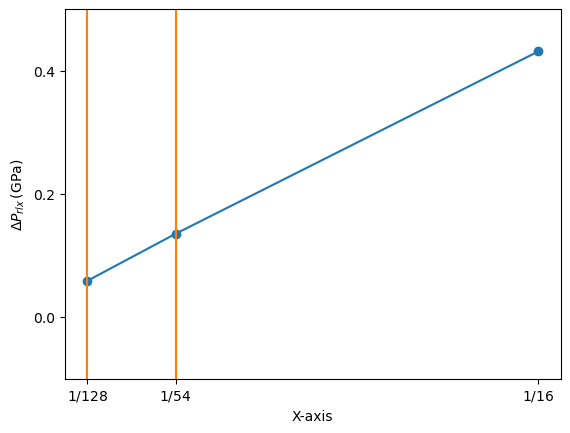

In [12]:
# Define the points
points = [(1/128, P3), (1/54, P2), (1/16, P1)]

# Separate x and y coordinates
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]

# Plot the points
plt.plot(x_values, y_values, 'o-')

# Customize x-axis ticks
plt.xticks([1/128, 1/54, 1/16], ['$1/128$', '$1/54$', '$1/16$'])

# Customize y-axis limits and ticks
plt.ylim(-0.1, 0.5)
plt.yticks([ 0.0, 0.2, 0.4])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel(r'$\Delta P_{rlx} \, (\mathrm{GPa})$')  # Using a raw string for LaTeX

plt.axvline(x=1/128, c="tab:orange")
plt.axvline(x=1/54, c="tab:orange")

# Show plot
plt.show()


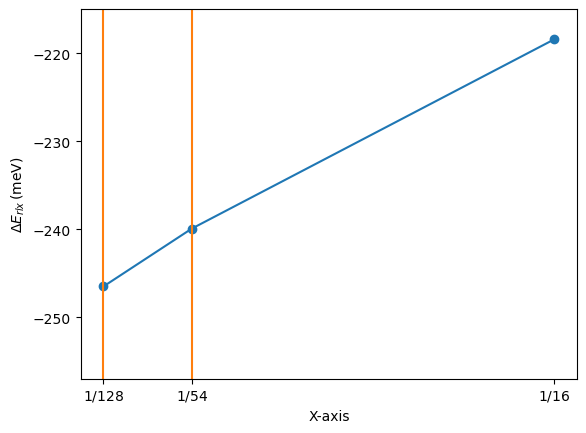

In [13]:
# Define the points
points = [(1/128, -E3*1000), (1/54, -E2*1000), (1/16, -E1*1000)]

# Separate x and y coordinates
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]

# Plot the points
plt.plot(x_values, y_values, 'o-')

# Customize x-axis ticks
plt.xticks([1/128, 1/54, 1/16], ['$1/128$', '$1/54$', '$1/16$'])

# Customize y-axis limits and ticks
plt.ylim(-257, -215)
plt.yticks([ -250, -240, -230, -220])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel(r'$\Delta E_{rlx} \, (\mathrm{meV})$')  # Using a raw string for LaTeX

plt.axvline(x=1/128, c="tab:orange")
plt.axvline(x=1/54, c="tab:orange")

# Show plot
plt.show()


In [65]:
E1

0.21842607979201034

In [66]:
E2

0.2399448922880083

In [67]:
E3

0.24651355322998825

In [82]:
job.list_potentials()

['FeH-NNIP',
 '2007--Lee-B-J--Fe-H--LAMMPS--ipr1',
 '2021--Wen-M--Fe-H--LAMMPS--ipr1',
 '2022--Starikov-S--Fe-Cr-H--LAMMPS--ipr1',
 '2023--Kumar-P--Fe-H--LAMMPS--ipr1',
 'MEAM_LAMMPS_LeeJang_2007_FeH__MO_095610951957_000',
 'Sim_LAMMPS_ReaxFF_AryanpourVanDuinKubicki_2010_FeHO__SM_222964216001_001',
 'FeH-NNIP']